In [1]:
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np
import pandas as pd
import base

In [2]:
# Extended telemetry with correct mass
t = base.process('sim_m235.csv')
base.setPlot(plot)

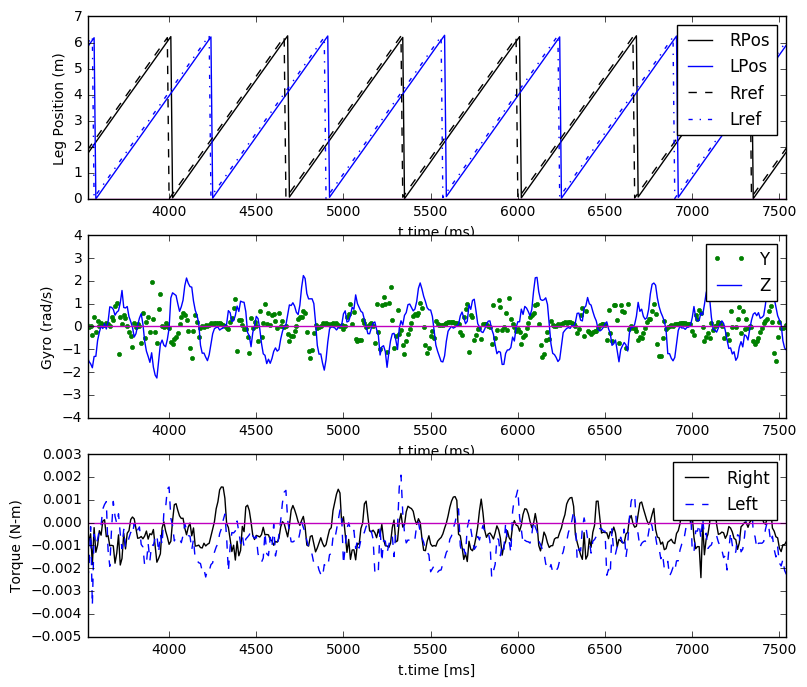

In [3]:
base.plotPAT(t)

# Position and Angle

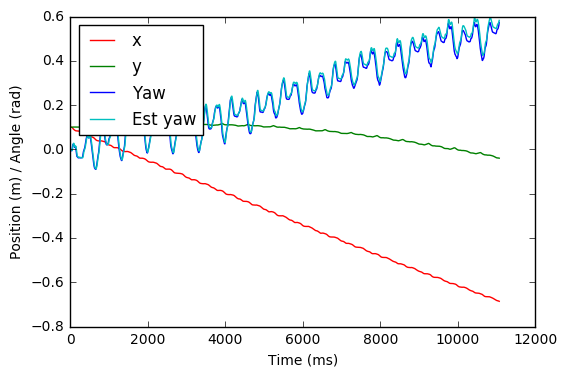

In [4]:
# The VelociROACH moves 0.1 m/s at 1.5 Hz; turns 180 degrees in 10 s
plot.plot(t.time, t.x, 'r', t.time, t.y, 'g', t.time, t.g, 'b', t.time, t.AngleZ, 'c')
plot.xlabel('Time (ms)')
plot.ylabel('Position (m) / Angle (rad)')
plot.legend(['x','y','Yaw', 'Est yaw'], loc=2)

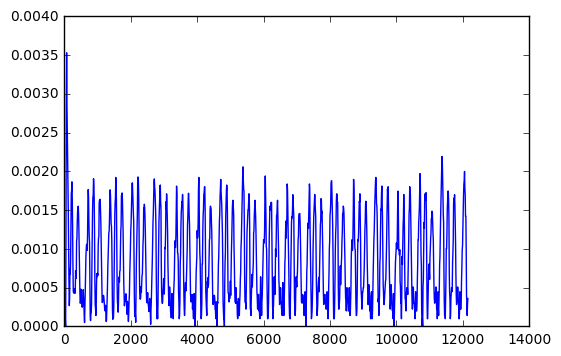

In [6]:
t['VelX'] = t.x.diff()
t['VelY'] = t.y.diff()
plot.plot(t.time, np.sqrt(np.square(t[['VelX','VelY']]).sum(axis=1)), 'b')

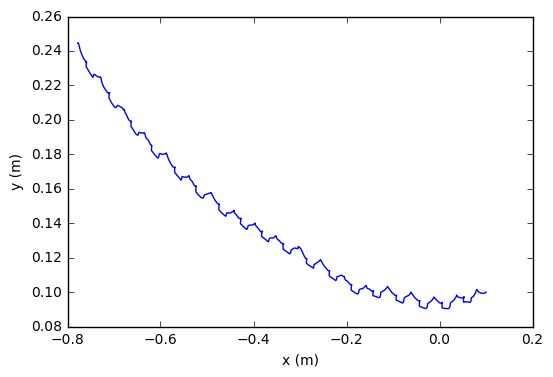

In [7]:
# Turns left
plot.plot(t.x, t.y, 'b')
plot.xlabel('x (m)')
plot.ylabel('y (m)')

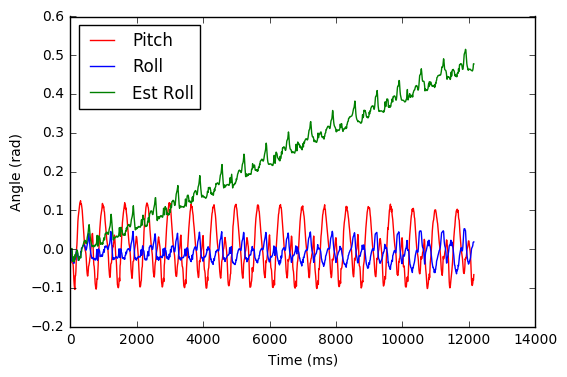

In [8]:
# Complicated dynamics: low-frequency changes, not periodic
# Est Roll from gyro drifts.. should remain near 0 because robot is on the ground
plot.plot(t.time, t.a, 'r', t.time, t.b, 'b', t.time, t.AngleY, 'g')
plot.xlabel('Time (ms)')
plot.ylabel('Angle (rad)')
plot.legend(['Pitch','Roll','Est Roll'], loc=2)

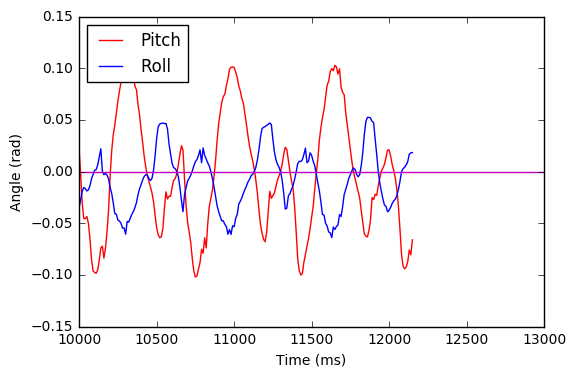

In [9]:
# Pitches forward when switching off, especially pronounced on right side
plot.plot(t.time, t.a, 'r', t.time, t.b, 'b')
plot.xlim([10e3,13e3])
plot.axhline(color='m')
plot.xlabel('Time (ms)')
plot.ylabel('Angle (rad)')
plot.legend(['Pitch','Roll'], loc=2)

# VelociROACH dynamics

Sample force sensor readout; total force = norm(Fx, Fy, Fz)


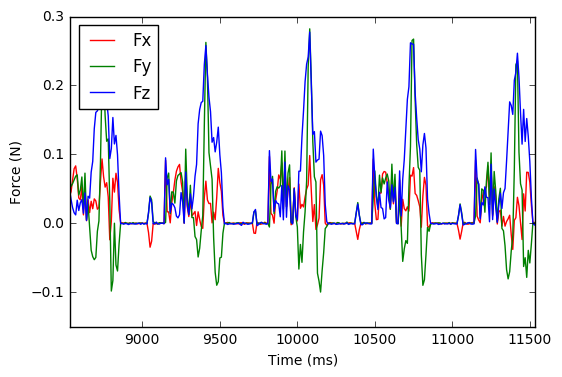

In [10]:
base.plotFXYZ(t)

Alternating tripod gait: roll right (positive) = LM force. Roll left = LF and LB force


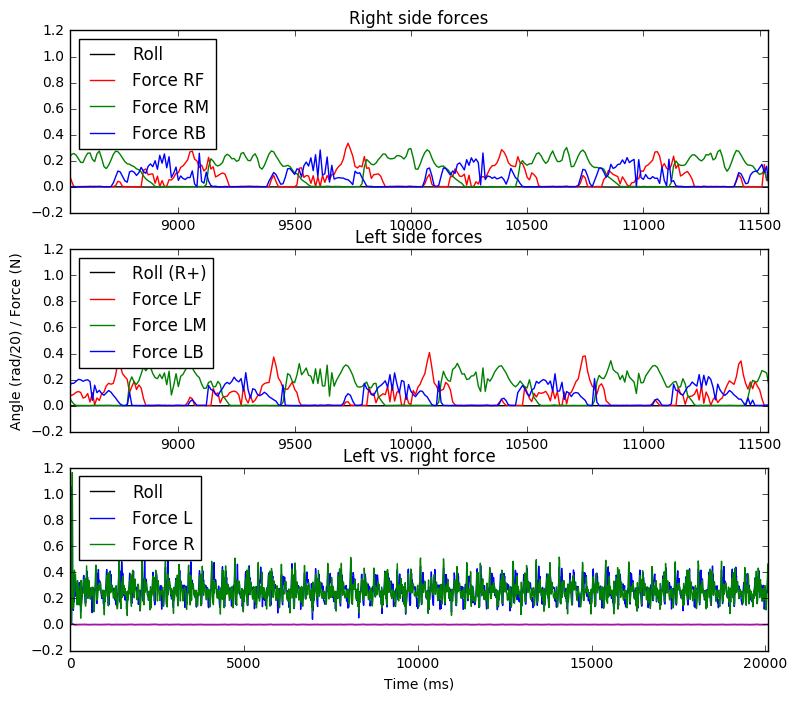

In [11]:
base.plotForceLR(t)

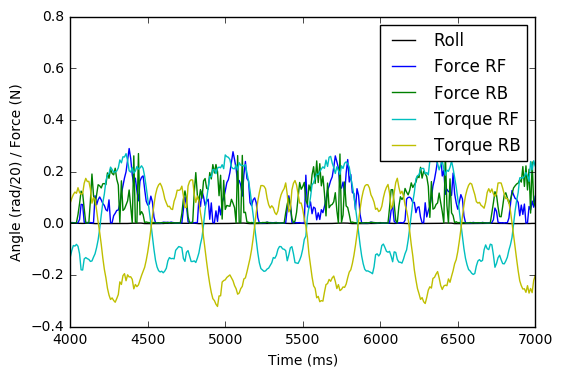

In [12]:
# Torques don't seem very useful
plot.plot(t.time, t.b/20, 'k', t.time, t.fRF, 'b', t.time, t.fRB, 'g',
          t.time, t.torqueR*50, 'c', t.time, t.torqueR1*50, 'y')
plot.xlim([4e3,7e3])
plot.xlabel('Time (ms)')
plot.ylabel('Angle (rad/20) / Force (N)')
plot.legend(['Roll','Force RF','Force RB','Torque RF','Torque RB'])

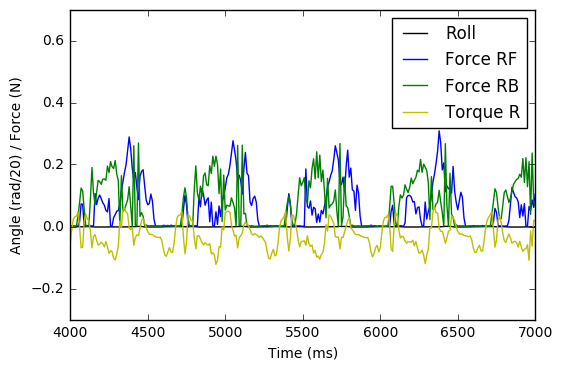

In [13]:
# Sum of forward and back motor torque, right side, still not useful
plot.plot(t.time, t.b/20, 'k', t.time, t.fRF, 'b', t.time, t.fRB, 'g',
          t.time, (t.torqueR+t.torqueR1)*50, 'y')
plot.xlim([4e3,7e3])
plot.xlabel('Time (ms)')
plot.ylabel('Angle (rad/20) / Force (N)')
plot.legend(['Roll','Force RF','Force RB','Torque R'])

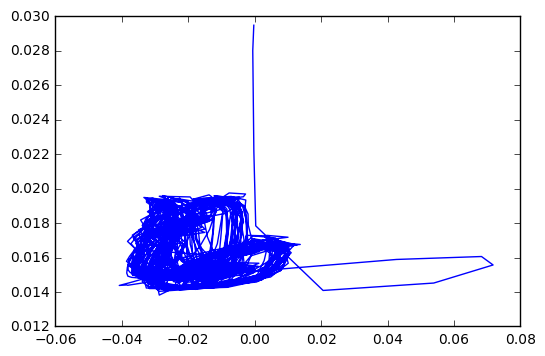

In [14]:
plot.plot(t.b, t.z, 'b')

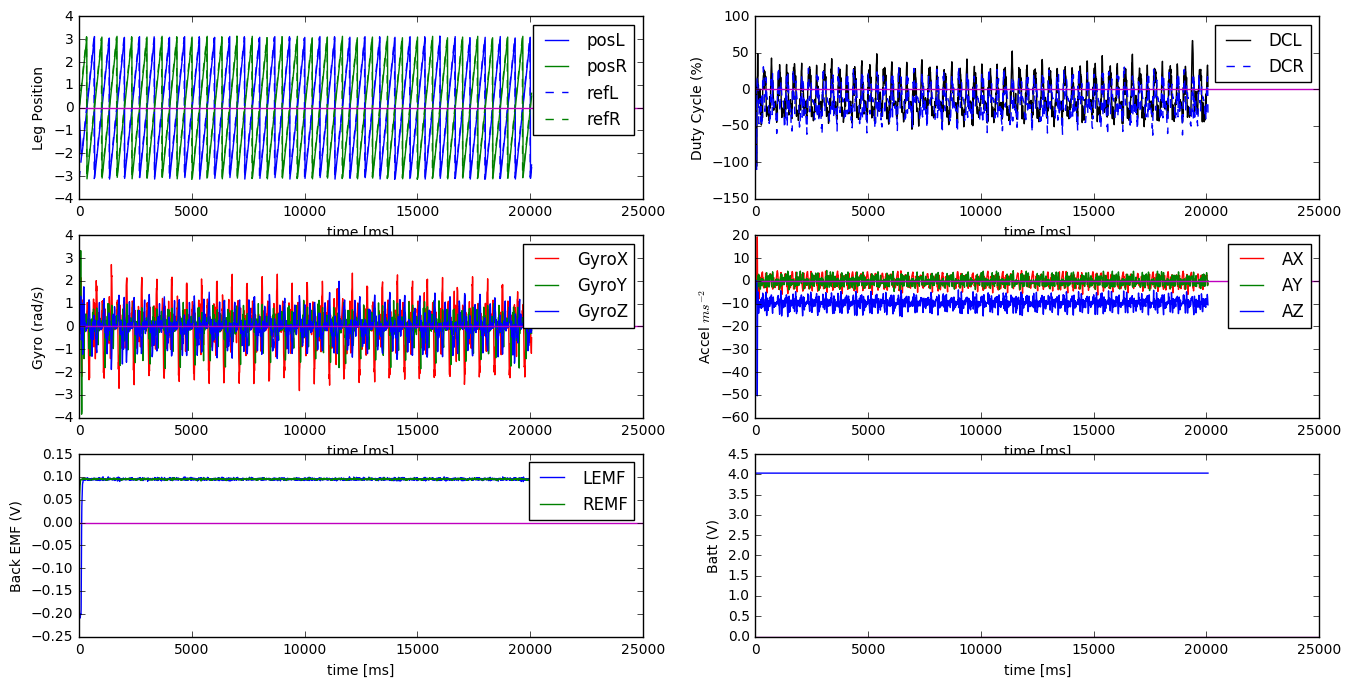

In [15]:
base.plotBasic(t)